In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv('Orders.csv', na_values=['Not Available', 'unknown'])

In [3]:
df.head()

,Order Id,Order Date,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub Category,Product Id,cost price,List Price,Quantity,Discount Percent
0,1,2023-03-01,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,FUR-BO-10001798,240,260,2,2
1,2,2023-08-15,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,FUR-CH-10000454,600,730,3,3
2,3,2023-01-10,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,OFF-LA-10000240,10,10,2,5
3,4,2022-06-18,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,FUR-TA-10000577,780,960,5,2
4,5,2022-07-13,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,OFF-ST-10000760,20,20,2,5


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Order Id          9994 non-null   int64 
 1   Order Date        9994 non-null   object
 2   Ship Mode         9988 non-null   object
 3   Segment           9994 non-null   object
 4   Country           9994 non-null   object
 5   City              9994 non-null   object
 6   State             9994 non-null   object
 7   Postal Code       9994 non-null   int64 
 8   Region            9994 non-null   object
 9   Category          9994 non-null   object
 10  Sub Category      9994 non-null   object
 11  Product Id        9994 non-null   object
 12  cost price        9994 non-null   int64 
 13  List Price        9994 non-null   int64 
 14  Quantity          9994 non-null   int64 
 15  Discount Percent  9994 non-null   int64 
dtypes: int64(6), object(10)
memory usage: 1.2+ MB


In [5]:
df.dropna(inplace = True)
df.isna().sum()

Order Id            0
Order Date          0
Ship Mode           0
Segment             0
Country             0
City                0
State               0
Postal Code         0
Region              0
Category            0
Sub Category        0
Product Id          0
cost price          0
List Price          0
Quantity            0
Discount Percent    0
dtype: int64

In [6]:
df.columns= df.columns.str.lower()

In [7]:
df.columns= df.columns.str.replace(' ', '_')

In [8]:
df.head(1)

,order_id,order_date,ship_mode,segment,country,city,state,postal_code,region,category,sub_category,product_id,cost_price,list_price,quantity,discount_percent
0,1,2023-03-01,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,FUR-BO-10001798,240,260,2,2


In [9]:
df['order_date'] = pd.to_datetime(df['order_date'])

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9988 entries, 0 to 9993
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   order_id          9988 non-null   int64         
 1   order_date        9988 non-null   datetime64[ns]
 2   ship_mode         9988 non-null   object        
 3   segment           9988 non-null   object        
 4   country           9988 non-null   object        
 5   city              9988 non-null   object        
 6   state             9988 non-null   object        
 7   postal_code       9988 non-null   int64         
 8   region            9988 non-null   object        
 9   category          9988 non-null   object        
 10  sub_category      9988 non-null   object        
 11  product_id        9988 non-null   object        
 12  cost_price        9988 non-null   int64         
 13  list_price        9988 non-null   int64         
 14  quantity          9988 n

In [11]:
df['disc_price'] = df['list_price']*df['discount_percent']*0.01

In [12]:
df['sale_price'] = df['list_price'] - df['disc_price']

In [13]:
df

,order_id,order_date,ship_mode,segment,country,city,state,postal_code,region,category,sub_category,product_id,cost_price,list_price,quantity,discount_percent,disc_price,sale_price
0,1,2023-03-01,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,FUR-BO-10001798,240,260,2,2,5.2,254.8
1,2,2023-08-15,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,FUR-CH-10000454,600,730,3,3,21.9,708.1
2,3,2023-01-10,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,OFF-LA-10000240,10,10,2,5,0.5,9.5
3,4,2022-06-18,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,FUR-TA-10000577,780,960,5,2,19.2,940.8
4,5,2022-07-13,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,OFF-ST-10000760,20,20,2,5,1.0,19.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9989,9990,2023-02-18,Second Class,Consumer,United States,Miami,Florida,33180,South,Furniture,Furnishings,FUR-FU-10001889,30,30,3,4,1.2,28.8
9990,9991,2023-03-17,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Furniture,Furnishings,FUR-FU-10000747,70,90,2,4,3.6,86.4
9991,9992,2022-08-07,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Technology,Phones,TEC-PH-10003645,220,260,2,2,5.2,254.8
9992,9993,2022-11-19,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Office Supplies,Paper,OFF-PA-10004041,30,30,4,3,0.9,29.1


In [14]:
cols = ['disc_price', 'discount_percent', 'list_price']
df.drop(cols, axis = 1,  inplace = True)

In [16]:
df

,order_id,order_date,ship_mode,segment,country,city,state,postal_code,region,category,sub_category,product_id,cost_price,quantity,sale_price
0,1,2023-03-01,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,FUR-BO-10001798,240,2,254.8
1,2,2023-08-15,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,FUR-CH-10000454,600,3,708.1
2,3,2023-01-10,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,OFF-LA-10000240,10,2,9.5
3,4,2022-06-18,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,FUR-TA-10000577,780,5,940.8
4,5,2022-07-13,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,OFF-ST-10000760,20,2,19.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9989,9990,2023-02-18,Second Class,Consumer,United States,Miami,Florida,33180,South,Furniture,Furnishings,FUR-FU-10001889,30,3,28.8
9990,9991,2023-03-17,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Furniture,Furnishings,FUR-FU-10000747,70,2,86.4
9991,9992,2022-08-07,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Technology,Phones,TEC-PH-10003645,220,2,254.8
9992,9993,2022-11-19,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Office Supplies,Paper,OFF-PA-10004041,30,4,29.1


In [17]:
df['cost_price'].groupby(df['segment']).sum()

segment
Consumer       1015820
Corporate       615880
Home Office     376500
Name: cost_price, dtype: int64

In [88]:
pip install pypyodbc

Note: you may need to restart the kernel to use updated packages.Requirement already satisfied: pypyodbc in c:\python310\lib\site-packages (1.3.6)



    tinycss2 (>=1.1.0<1.2) ; extra == 'css'
             ~~~~~~~~^

[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [89]:
import pypyodbc as obdc

In [90]:
pip install sqlalchemy pyodbc pandas

Note: you may need to restart the kernel to use updated packages.Collecting sqlalchemy
   ---------------------------------------- 2.1/2.1 MB 3.4 MB/s eta 0:00:00
  Attempting uninstall: typing-extensions
    Found existing installation: typing_extensions 4.4.0
    Uninstalling typing_extensions-4.4.0:
      Successfully uninstalled typing_extensions-4.4.0



    tinycss2 (>=1.1.0<1.2) ; extra == 'css'
             ~~~~~~~~^

[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [18]:
import pandas as pd
from sqlalchemy import create_engine

server = "LAPTOP-S01ARRIK\SQLEXPRESS"
database = "yashdb"
engine = create_engine(f"mssql+pyodbc://@LAPTOP-S01ARRIK\SQLEXPRESS/yashdb?trusted_connection=yes&driver=ODBC+Driver+17+for+SQL+Server")

df.to_sql("df_orders", con=engine, if_exists="replace", index=False)

print("Data successfully exported to SQL Server!")


Data successfully exported to SQL Server!


In [19]:
df

,order_id,order_date,ship_mode,segment,country,city,state,postal_code,region,category,sub_category,product_id,cost_price,quantity,sale_price
0,1,2023-03-01,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,FUR-BO-10001798,240,2,254.8
1,2,2023-08-15,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,FUR-CH-10000454,600,3,708.1
2,3,2023-01-10,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,OFF-LA-10000240,10,2,9.5
3,4,2022-06-18,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,FUR-TA-10000577,780,5,940.8
4,5,2022-07-13,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,OFF-ST-10000760,20,2,19.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9989,9990,2023-02-18,Second Class,Consumer,United States,Miami,Florida,33180,South,Furniture,Furnishings,FUR-FU-10001889,30,3,28.8
9990,9991,2023-03-17,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Furniture,Furnishings,FUR-FU-10000747,70,2,86.4
9991,9992,2022-08-07,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Technology,Phones,TEC-PH-10003645,220,2,254.8
9992,9993,2022-11-19,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Office Supplies,Paper,OFF-PA-10004041,30,4,29.1


## 1.)  Find top 10 highest revenue generating products:

In [29]:
df['revenue'] = df['sale_price'] * df['quantity']

In [56]:
top10 = df.groupby('product_id', as_index = None)['revenue'].sum().sort_values('revenue' , ascending = False).head(10)

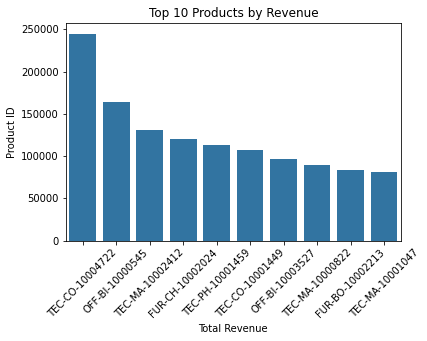

In [63]:
sns.barplot(data = top10, y = 'revenue', x = 'product_id')
plt.xticks(rotation = 45)
plt.xlabel('Total Revenue')
plt.ylabel('Product ID')
plt.title('Top 10 Products by Revenue')
plt.show()

## 2.) Find top 5 highest selling products in each region:

In [91]:
df_grouped = df.groupby(['region', 'product_id'], as_index=False)['quantity'].sum()
df_grouped

,region,product_id,quantity
0,Central,FUR-BO-10000112,9
1,Central,FUR-BO-10000362,3
2,Central,FUR-BO-10000468,4
3,Central,FUR-BO-10000711,3
4,Central,FUR-BO-10000780,17
...,...,...,...
5293,West,TEC-PH-10004896,3
5294,West,TEC-PH-10004897,3
5295,West,TEC-PH-10004908,22
5296,West,TEC-PH-10004922,9


In [83]:
df_grouped['rank'] = df_grouped.groupby('region')['quantity'].rank(method = 'first', ascending = False)

In [84]:
top_5_per_region = df_grouped[df_grouped['rank'] <= 5].sort_values(['region', 'rank'])

In [85]:
top_5_per_region

,region,product_id,quantity,Rank,rank
461,Central,OFF-BI-10000301,34,1.0,1.0
474,Central,OFF-BI-10000756,33,2.0,2.0
470,Central,OFF-BI-10000546,29,3.0,3.0
491,Central,OFF-BI-10001249,29,4.0,4.0
61,Central,FUR-CH-10002304,27,5.0,5.0
2190,East,OFF-PA-10001970,33,1.0,1.0
1914,East,OFF-BI-10003656,32,2.0,2.0
1549,East,FUR-FU-10004848,31,3.0,3.0
2018,East,OFF-FA-10000621,31,4.0,4.0
2031,East,OFF-FA-10002780,29,5.0,5.0


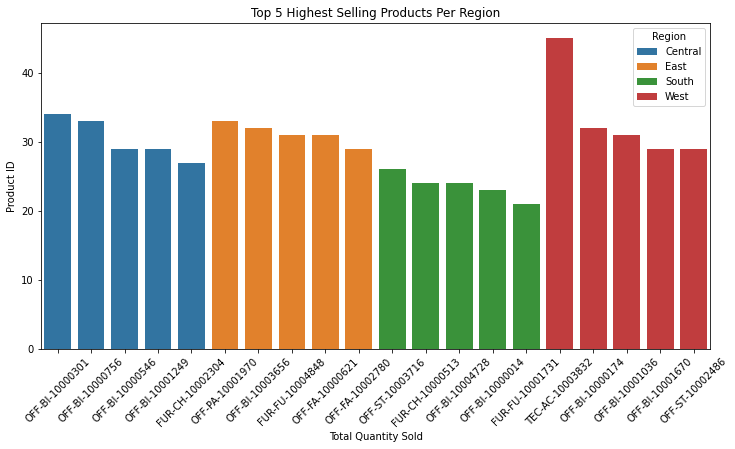

In [87]:
plt.figure(figsize=(12, 6))
sns.barplot(x='product_id', y='quantity', hue='region', data=top_5_per_region)

plt.xlabel('Total Quantity Sold')
plt.ylabel('Product ID')
plt.title('Top 5 Highest Selling Products Per Region')
plt.legend(title='Region')
plt.xticks(rotation = 45)

plt.show()

## 3.) Find month over month growth comparison for 2022 and 2023 sales

In [153]:
df['order_year'] = df['order_date'].dt.year
df['order_month'] = df['order_date'].dt.month

In [155]:
df_grouped = df.groupby(['order_year', 'order_month'], as_index=False)['sale_price'].sum()

In [156]:
df_pivot = df_grouped.pivot(index='order_month', columns='order_year', values='sale_price').reset_index()

In [161]:
df_pivot = df_pivot.rename(columns={2022: 'sales_2022', 2023: 'sales_2023'})

In [162]:
df_pivot.fillna(0, inplace=True)



In [163]:
df_pivot = df_pivot.sort_values('order_month')

In [167]:
df_pivot

order_year,order_month,sales_2022,sales_2023
0,1,94712.5,88632.6
1,2,90091.0,128124.2
2,3,80057.5,80834.0
3,4,95451.6,111568.6
4,5,79448.3,86447.9
5,6,94170.5,68976.5
6,7,78652.2,90411.8
7,8,104808.0,87733.6
8,9,79142.2,76658.6
9,10,118912.7,121061.5


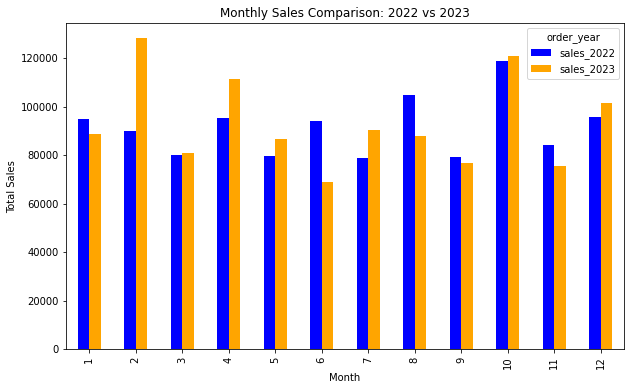

In [171]:
df_pivot.set_index('order_month')[['sales_2022', 'sales_2023']].plot(kind='bar', figsize=(10, 6), color=['blue', 'orange'])
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.title('Monthly Sales Comparison: 2022 vs 2023')

plt.show()

## 4.) For each category which month had highest sale

In [109]:
df['order_year_month'] = df['order_date'].dt.strftime('%Y%m')

In [113]:
df['order_year_month']

0       202303
1       202308
2       202301
3       202206
4       202207
         ...  
9989    202302
9990    202303
9991    202208
9992    202211
9993    202207
Name: order_year_month, Length: 9988, dtype: object

In [115]:
df_grouped = df.groupby(['order_year_month', 'category'], as_index=False).agg({'sale_price': 'sum', 'quantity': 'sum'})
df_grouped

,order_year_month,category,sale_price,quantity
0,202201,Furniture,32728.6,369
1,202201,Office Supplies,31449.9,1012
2,202201,Technology,30534.0,269
3,202202,Furniture,32829.8,327
4,202202,Office Supplies,33841.0,962
...,...,...,...,...
67,202311,Office Supplies,22024.9,892
68,202311,Technology,27517.9,288
69,202312,Furniture,32305.9,338
70,202312,Office Supplies,37586.4,973


In [116]:
df_grouped['revenue'] = df_grouped['sale_price'] * df_grouped['quantity']
df_grouped

,order_year_month,category,sale_price,quantity,revenue
0,202201,Furniture,32728.6,369,12076853.4
1,202201,Office Supplies,31449.9,1012,31827298.8
2,202201,Technology,30534.0,269,8213646.0
3,202202,Furniture,32829.8,327,10735344.6
4,202202,Office Supplies,33841.0,962,32555042.0
...,...,...,...,...,...
67,202311,Office Supplies,22024.9,892,19646210.8
68,202311,Technology,27517.9,288,7925155.2
69,202312,Furniture,32305.9,338,10919394.2
70,202312,Office Supplies,37586.4,973,36571567.2


In [126]:
df_grouped['rank'] = df_grouped.groupby('category')['revenue'].rank(method='first', ascending=False)
df_grouped = df_grouped.sort_values(['category', 'rank'])

In [133]:
best_month = df_grouped[df_grouped['rank']==1].sort_values('revenue', ascending = False)

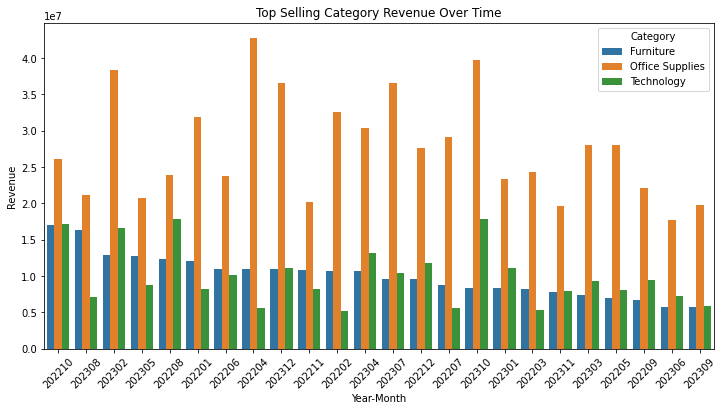

In [135]:
plt.figure(figsize=(12, 6))

# Bar plot
sns.barplot(x='order_year_month', y='revenue', hue='category', data=df_grouped)

# Rotate X-axis labels for better readability
plt.xticks(rotation=45)

# Labels and Title
plt.xlabel('Year-Month')
plt.ylabel('Revenue')
plt.title('Top Selling Category Revenue Over Time')

# Show the legend
plt.legend(title='Category')

# Display plot
plt.show()

## 5.) Which sub category had the highest growth by profit in 2023 compare to 2022

In [174]:
df['order_year'] = df['order_date'].dt.year




In [175]:
df_grouped = df.groupby(['sub_category', 'order_year'], as_index=False)['profit'].sum()

In [176]:
df_grouped

,sub_category,order_year,profit
0,Accessories,2022,38798.3
1,Accessories,2023,40613.7
2,Appliances,2022,37088.7
3,Appliances,2023,17461.4
4,Art,2022,5333.0
5,Art,2023,5079.2
6,Binders,2022,40812.5
7,Binders,2023,57979.5
8,Bookcases,2022,25494.7
9,Bookcases,2023,25776.1


In [177]:
df_pivot = df_grouped.pivot(index='sub_category', columns='order_year', values='profit').reset_index()
df_pivot = df_pivot.rename(columns={2022: 'sales_2022', 2023: 'sales_2023'})

In [178]:
df_pivot.fillna(0, inplace=True)

In [179]:
df_pivot

order_year,sub_category,sales_2022,sales_2023
0,Accessories,38798.3,40613.7
1,Appliances,37088.7,17461.4
2,Art,5333.0,5079.2
3,Binders,40812.5,57979.5
4,Bookcases,25494.7,25776.1
5,Chairs,78672.5,75233.2
6,Copiers,42703.1,26561.8
7,Envelopes,2607.3,3502.4
8,Fasteners,370.7,87.9
9,Furnishings,22665.8,16428.4


In [180]:
df_pivot['percent_profit'] = ((df_pivot['sales_2023'] - df_pivot['sales_2022']) * 100) / df_pivot['sales_2022']

In [181]:
df_pivot[df_pivot['percent_profit']==df_pivot['percent_profit'].max()]

order_year,sub_category,sales_2022,sales_2023,percent_profit
15,Supplies,5161.0,9241.5,79.064135
